In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from wordcloud import WordCloud 

In [72]:
data = pd.read_csv('C:/Users/asemprini/Google Drive/noticias/ejemplos/spam.csv')
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
data.columns = ['label','data']

In [73]:
obj = TfidfVectorizer()

sentences = data.loc[:,['data']]

In [74]:
X = obj.fit_transform(sentences['data'])

In [75]:
print(np.size(obj.get_feature_names()))
X.shape

8673


(5572, 8673)

In [76]:
d = {'ham':0, 'spam':1}
Y = data['label'].map(d)

In [82]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33)

In [83]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print ("Classification Rate for NB: ", model.score(Xtest, Ytest))

Classification Rate for NB:  0.9488852637302883


In [84]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)

print ("Classification Rate for AdaBoost", model.score(Xtest, Ytest))

Classification Rate for AdaBoost 0.9613920609026645


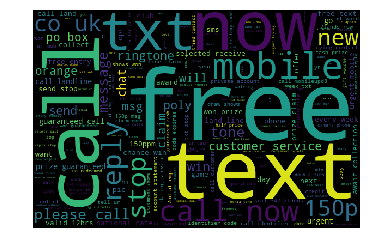

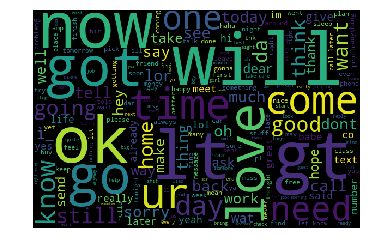

In [88]:
import matplotlib.pyplot as plt

def visualize(label):
    words = ''
    for msg in data[data['label'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
visualize('spam')
visualize('ham')

In [106]:
data['predictions'] = model.predict(X)
data['b_labels'] = Y

sneaky_spam = data[(data['predictions'] == 0) & (data['b_labels'] == 1)][['predictions','b_labels','data']]
#print(data[['label','b_labels']])
print(sneaky_spam)

      predictions  b_labels                                               data
5               0         1  FreeMsg Hey there darling it's been 3 week's n...
19              0         1  England v Macedonia - dont miss the goals/team...
54              0         1  SMS. ac Sptv: The New Jersey Devils and the De...
68              0         1  Did you hear about the new \Divorce Barbie\"? ...
116             0         1  You are a winner U have been specially selecte...
133             0         1  Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
146             0         1  FreeMsg Why haven't you replied to my text? I'...
159             0         1  You are a winner U have been specially selecte...
164             0         1  BangBabes Ur order is on the way. U SHOULD rec...
414             0         1  100 dating service cal;l 09064012103 box334sk38ch
528             0         1  You will recieve your tone within the next 24h...
575             0         1  You have won ?1,000 cas